<a href="https://colab.research.google.com/github/snz-mlcoder/Fashion/blob/main/GOLDprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [15]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [18]:
df = pd.read_csv('/content/drive/My Drive/gld_price_data.csv')
df.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [20]:
df.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [21]:
df.tail()


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [22]:
df.shape

(2290, 6)

**data cleaning **

In [23]:
df.isnull().sum()


,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


### Exploratory Data Analysis (EDA)[link text](https://)

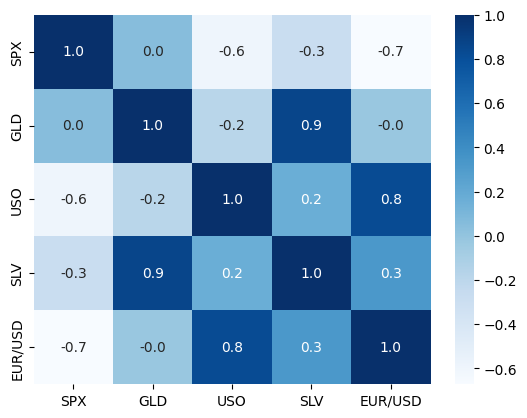

In [35]:
gold_relation = df[['SPX' , 'GLD','USO','SLV', 'EUR/USD']].corr()
sns.heatmap(gold_relation, annot=True , fmt='.1F' , cmap= 'Blues')
plt.show()


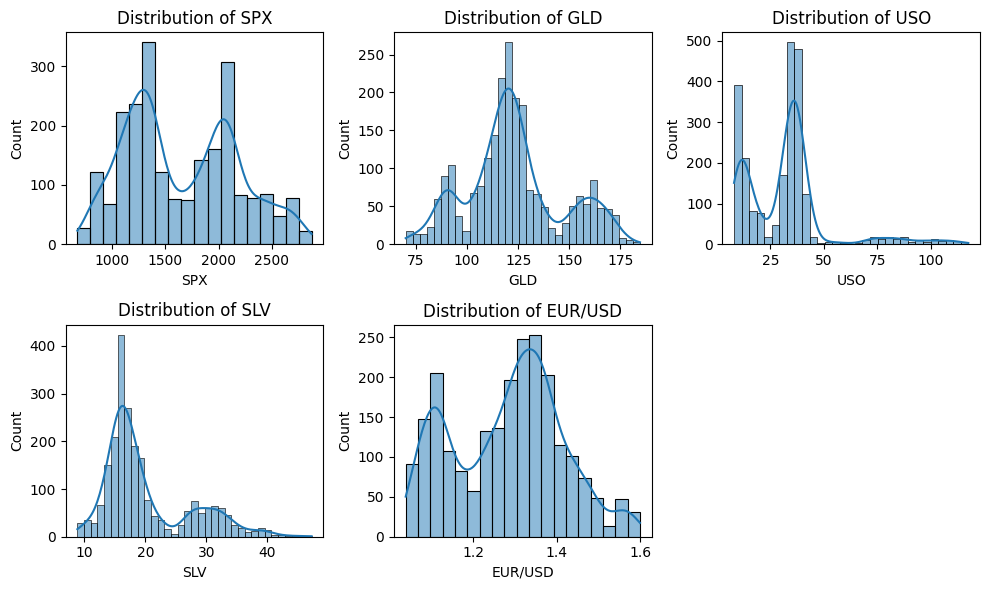

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Histogram for SPX
plt.subplot(2, 3, 1) # means 2 rows and 3 clomns of plot
sns.histplot(df['SPX'],  kde=True)
plt.title('Distribution of SPX')
# Histogram for GLD
plt.subplot(2, 3, 2)
sns.histplot(df['GLD'], kde=True)
plt.title('Distribution of GLD')
# Histogram for USO
plt.subplot(2, 3, 3)
sns.histplot(df['USO'], kde=True)
plt.title('Distribution of USO')
# Histogram for SLV
plt.subplot(2, 3, 4)
sns.histplot(df['SLV'], kde=True)
plt.title('Distribution of SLV')
# Histogram for EUR/USD
plt.subplot(2, 3, 5)
sns.histplot(df['EUR/USD'], kde=True)
plt.title('Distribution of EUR/USD')
plt.tight_layout()
plt.show()

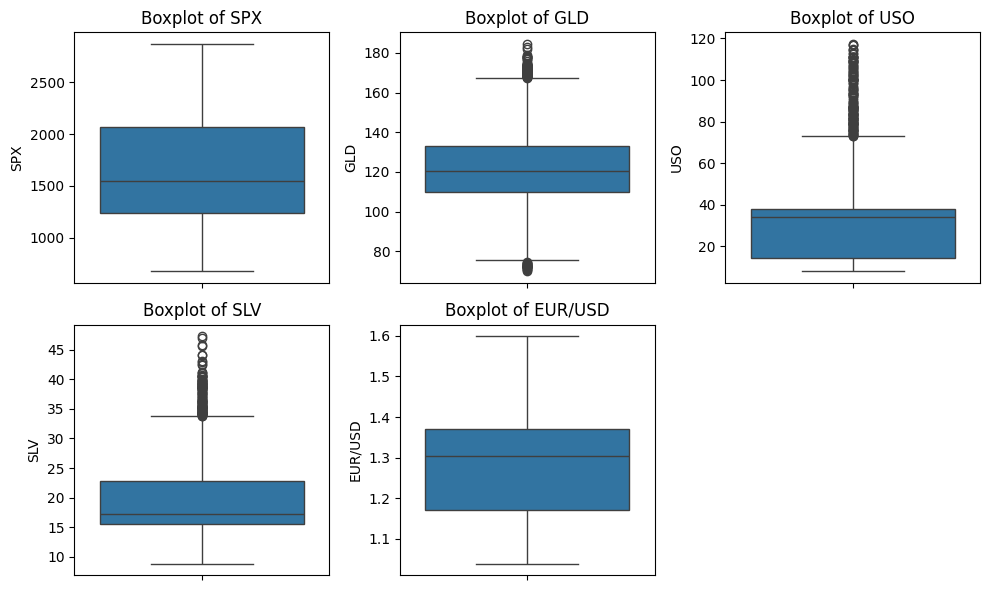

In [42]:
plt.figure(figsize=(10, 6))
# Boxplot for SPX
plt.subplot(2, 3, 1)
sns.boxplot(y=df['SPX'])
plt.title('Boxplot of SPX')
# Boxplot for GLD
plt.subplot(2, 3, 2)
sns.boxplot(y=df['GLD'])
plt.title('Boxplot of GLD')
# Boxplot for USO
plt.subplot(2, 3, 3)
sns.boxplot(y=df['USO'])
plt.title('Boxplot of USO')
# Boxplot for SLV
plt.subplot(2, 3, 4)
sns.boxplot(y=df['SLV'])
plt.title('Boxplot of SLV')
# Boxplot for EUR/USD
plt.subplot(2, 3, 5)
sns.boxplot(y=df['EUR/USD'])
plt.title('Boxplot of EUR/USD')
plt.tight_layout()
plt.show()

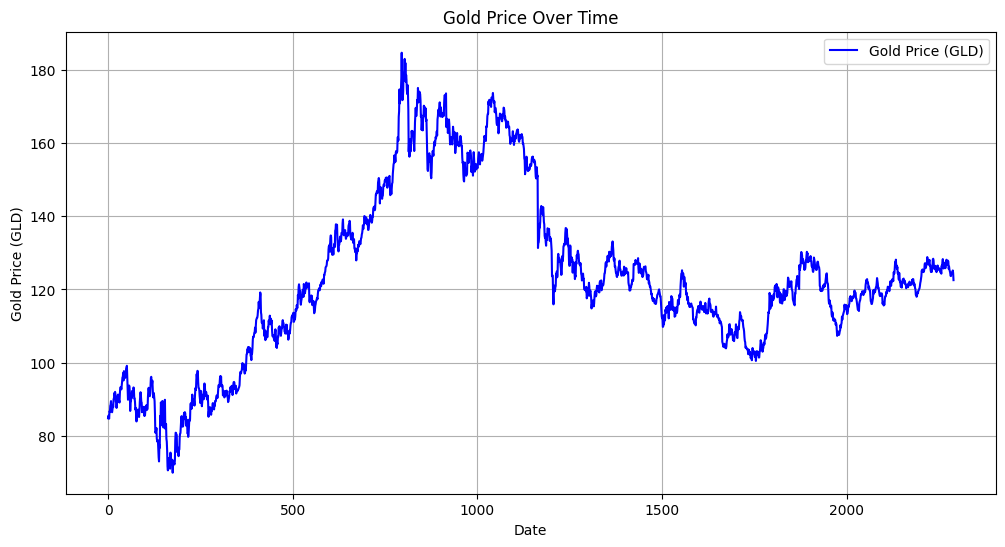

In [44]:
 # Plotting the time series data for GLD
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GLD'], label='Gold Price (GLD)',color='Blue')
plt.xlabel('Date')
plt.ylabel('Gold Price (GLD)')
plt.title('Gold Price Over Time')
plt.legend()
plt.grid(True)
plt.show()